In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
loan = pd.read_csv('loan.csv', low_memory=False)

### Data Cleaning

In [95]:
loan["int_rate"] = pd.Series(loan["int_rate"]).str.replace("%", "").astype(float)
loan["revol_util"] = pd.Series(loan["revol_util"]).str.replace("%", "").astype(float)
loan["term"] = loan.term.apply(lambda x: x.replace(' months',''))
loan.shape

(39717, 111)

In [96]:
total = loan.isnull().sum().sort_values(ascending=False)
percent = (loan.isnull().sum()/loan.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(60)

,Total,Percent
total_il_high_credit_limit,39717,1.000000
mo_sin_old_rev_tl_op,39717,1.000000
bc_util,39717,1.000000
bc_open_to_buy,39717,1.000000
avg_cur_bal,39717,1.000000
acc_open_past_24mths,39717,1.000000
inq_last_12m,39717,1.000000
total_cu_tl,39717,1.000000
inq_fi,39717,1.000000
total_rev_hi_lim,39717,1.000000


In [97]:
# Dropping columns that are completely null
loan.drop(['mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'], axis=1, inplace=True)

# Dropping columns that are either null/zero or all zeros
loan.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','collections_12_mths_ex_med'], axis=1, inplace=True)

#Dropping columns that are not required
loan.drop(['url','desc','title', 'zip_code', 'id', 'member_id'], axis=1, inplace=True)

#Dropping column 'pymnt_plan', 'policy_code', 'application_type' as the entire column has 
#'n', '1', 'INDIVIDUAL', 'f' as its values respectively 
loan.drop(['pymnt_plan','policy_code','application_type','initial_list_status'], axis=1, inplace=True)

## Also removing these rows as more than 95% of columns are NA
loan.drop(['mths_since_last_record','mths_since_last_delinq','next_pymnt_d'], axis=1, inplace=True)
loan.shape

(39717, 39)

In [63]:
loan.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

### Data imputation:

In [98]:
loan.loc[pd.isnull(loan['emp_title']), ['emp_title']] = 'SELF_EMPLOYED'
loan.loc[pd.isnull(loan['emp_length']), ['emp_length']] = 'NOT_KNOWN'
loan.loc[pd.isnull(loan['pub_rec_bankruptcies']), ['pub_rec_bankruptcies']] = '-1' ## No Data
loan.loc[pd.isnull(loan['last_credit_pull_d']), ['last_credit_pull_d']] = 'NO_DATA'
loan.loc[pd.isnull(loan['last_pymnt_d']), ['last_pymnt_d']] = 'NO_DATA'
loan.loc[pd.isnull(loan['revol_util']), ['revol_util']] = 0

In [99]:
loan.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_rec

### Finding Categorical and numeric columns

In [100]:
numerical_feats = loan.dtypes[loan.dtypes != "object"].index
print("# of Numerical features: ", len(numerical_feats))

categorical_feats = loan.dtypes[loan.dtypes == "object"].index
print("# of Categorical features: ", len(categorical_feats))

# of Numerical features:  24
# of Categorical features:  15


In [101]:
categorical_feats

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'earliest_cr_line', 'last_pymnt_d',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [102]:
numerical_feats

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt'],
      dtype='object')

### Derived Metrics

In [103]:
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']

In [104]:
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str
loan[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
4,Dec-11,Dec,11


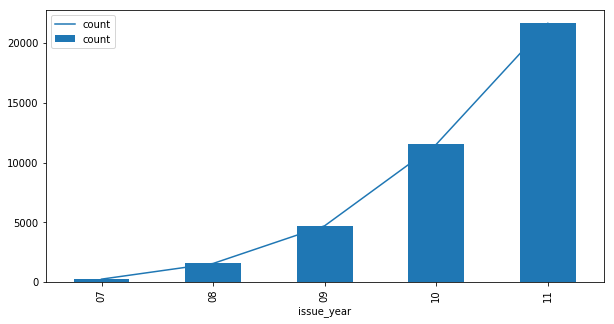

In [105]:
year_wise =loan.groupby(by= [loan.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(10,5),ax = ax)
plt.show()

##### Inference: 
* There is a steady increase in the issuance of loan

In [106]:
# Annual Income Range
bins = [0, 50000, 100000, 200000, 400000, 6000000]
slot = ['< 50k', '50k - 1L', '1L - 2L', '2L - 4L', '4L +']
loan['annual_inc_type'] = pd.cut(loan['annual_inc'], bins, labels=slot)

In [107]:
loan.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [108]:
# Loan Amount Range
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [109]:
# Interest Rate Range
bins = [0, 6, 12, 18, 25]
slot = ['0-6', '7-12', '13-18', '19-25']
loan['int_rate_type'] = pd.cut(loan['int_rate'], bins, labels=slot)

### Outlier Analysis

In [110]:
loan.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

###### Inference:
* It is clear that 60 Lakhs as the annual income is an outlier as most people annual income fall between 0-2 Lakhs as we see in the previous graph

### Outlier Treatment

In [111]:
annual_inc_percentile = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < annual_inc_percentile]
loan["annual_inc"].describe()

count     39494.000000
mean      66378.257586
std       37413.212327
min        4000.000000
25%       40000.000000
50%       58776.000000
75%       81996.000000
max      294000.000000
Name: annual_inc, dtype: float64

### Data understanding - Categorical variable

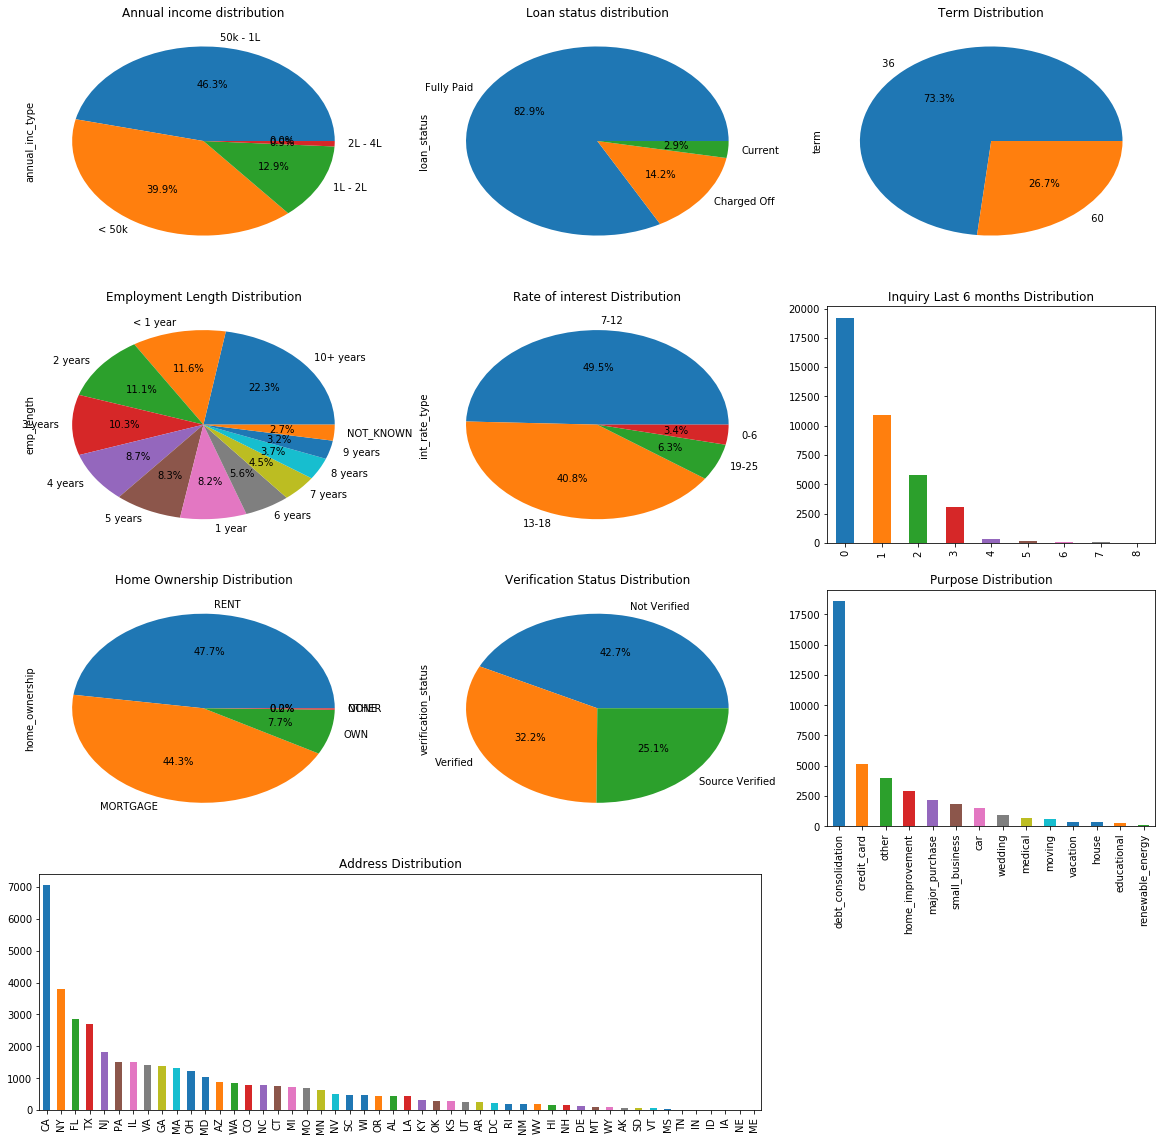

In [112]:
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
plt.title('Annual income distribution')
loan['annual_inc_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.subplot(4,3,2)
plt.title('Loan status distribution')
loan['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.subplot(4,3,3)
plt.title('Term Distribution')
loan['term'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.subplot(4,3,4)
plt.title('Employment Length Distribution')
loan['emp_length'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.subplot(4,3,5)
plt.title('Rate of interest Distribution')
loan['int_rate_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.subplot(4,3,6)
plt.title('Inquiry Last 6 months Distribution')
loan['inq_last_6mths'].value_counts().plot(kind='bar')

plt.subplot(4,3,7)
plt.title('Home Ownership Distribution')
loan['home_ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.subplot(4,3,8)
plt.title('Verification Status Distribution')
loan['verification_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.subplot(4,3,9)
plt.title('Purpose Distribution')
loan['purpose'].value_counts().plot(kind='bar')


plt.subplot(4,3,(10,11))
plt.title('Address Distribution')
loan['addr_state'].value_counts().plot(kind='bar')
plt.show()

###### Inference:
* 14.2% persons are labelled as 'Charged Off'
* Most people opted for 36 years as their loan term
* People with Annual income below 2 lakhs have taken more loans
* People with Employment Length > 10 years have taken more loan
* People have 7%-12% of rate of interest have opted more loans
* Most people who opted for loan didnt make any enquiries or only less number of enquiries.
* People who has RENT or MORTGAGE takes loan
* Maximum loans were provided without verification
* Pepole get loans more for the category 'debt_consolidation'
* People in 'CA' have taken more loans

### Univariate Analysis - Overall snapshot of numerical variables with Loan Status

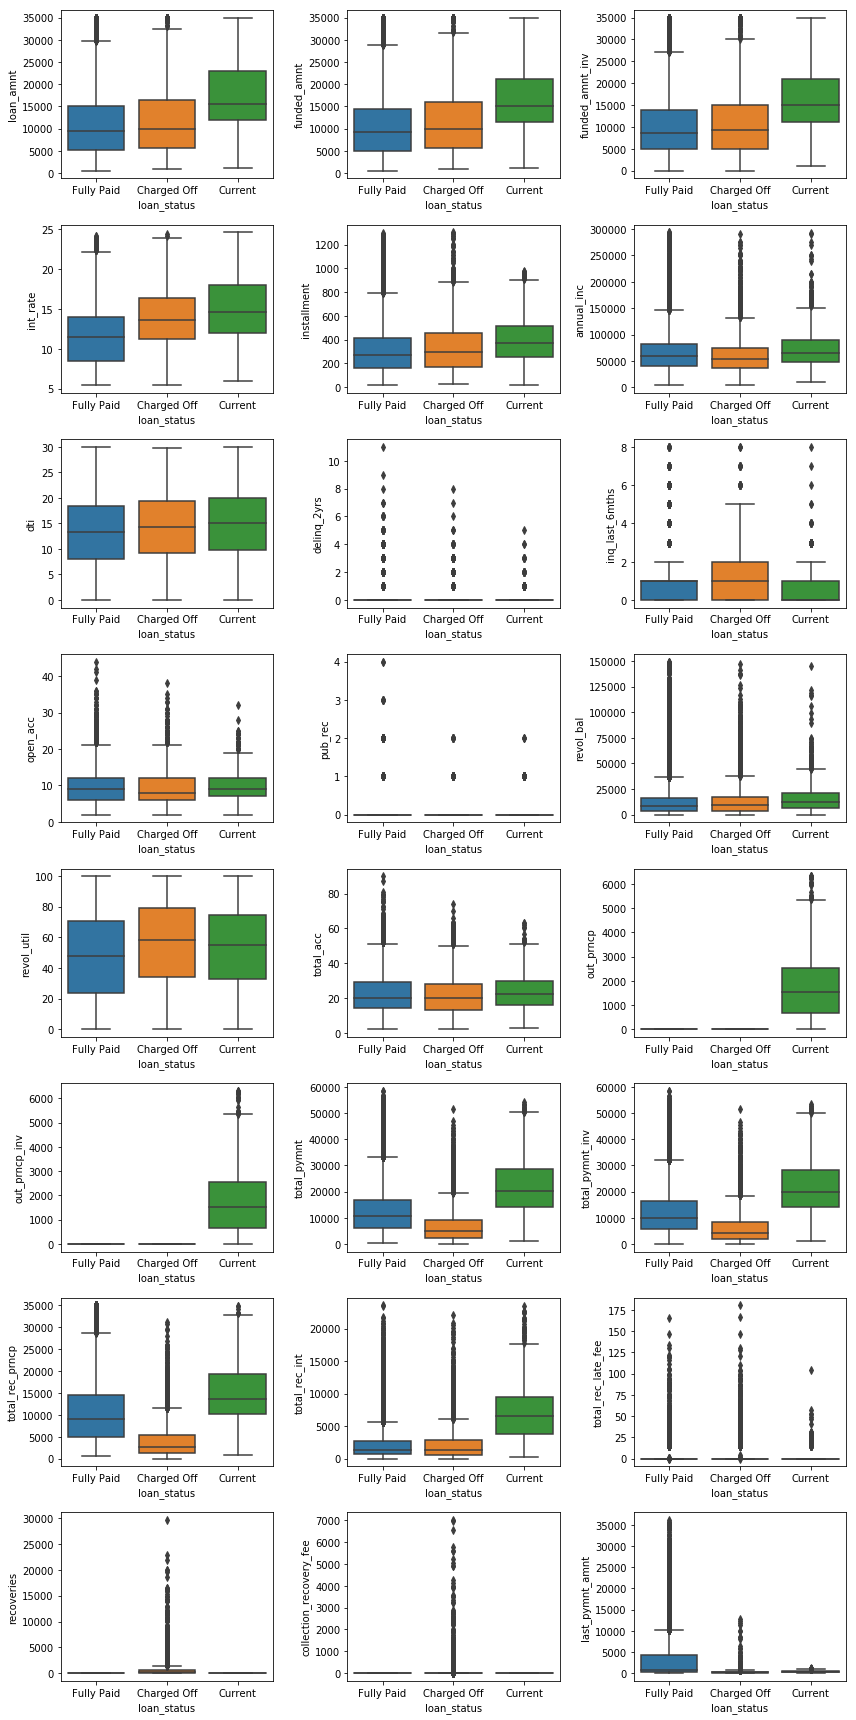

In [113]:
li_num_feats = list(numerical_feats)
nr_rows = 8
nr_cols = 3
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_num_feats):
            sns.boxplot(y=li_num_feats[i], x='loan_status', data=loan, ax = axs[r][c])    
plt.tight_layout()    
plt.show()

### Univariate Analysis - Overall correlation snapshot of numerical variables

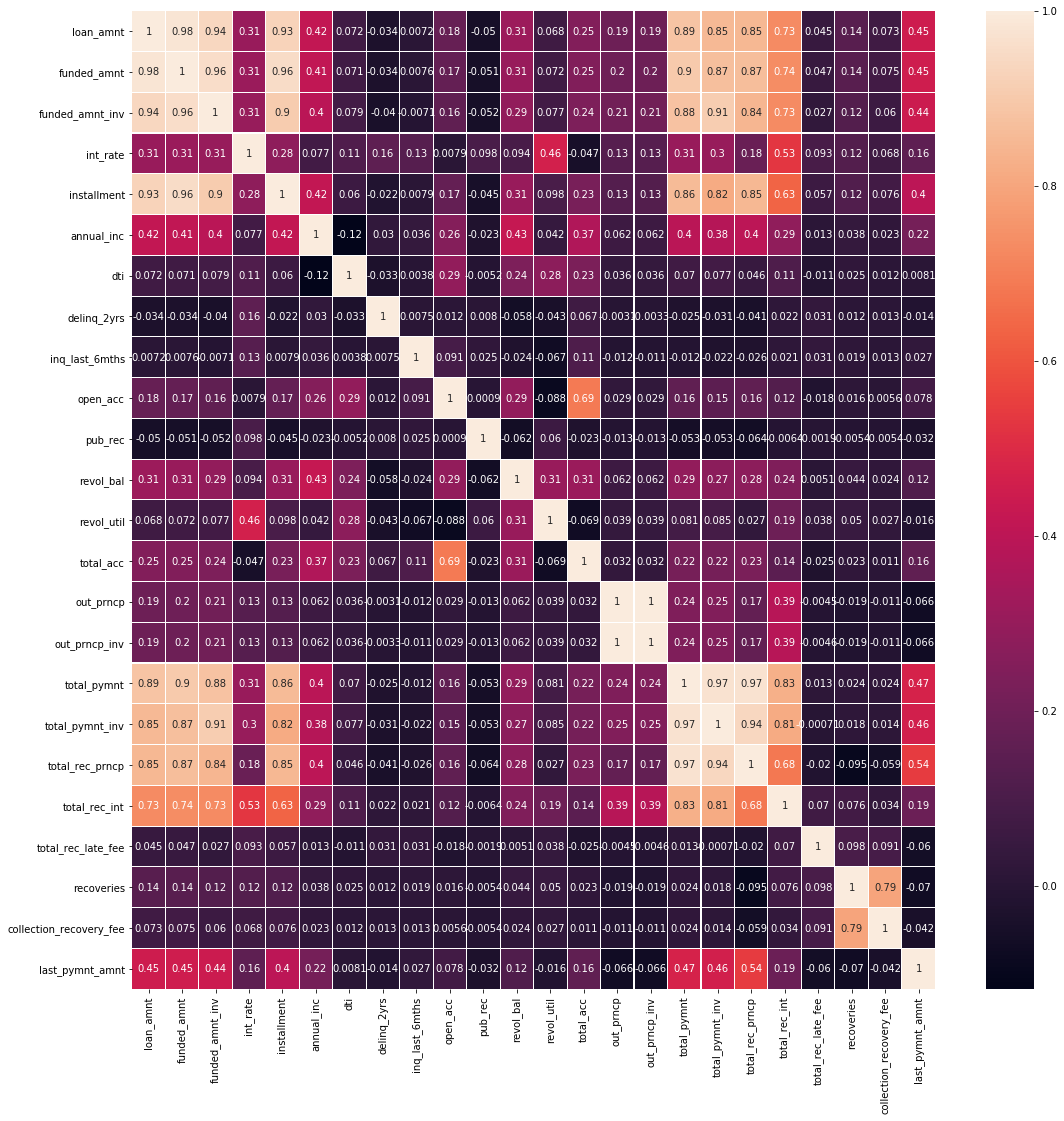

In [114]:
li=loan[numerical_feats]
corr=li.corr()
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,linewidths=.1)

##### Inference: Correlation between variable that are observed on heatmap
* loan amount, funded amount,funded_amnt_inv and installments show high correlation amongst each other, hence any one column can be taken for consideration for analysis.
* total_payment,total payment_inv,total_rec_prncp and total_rec_int exhibit the same feature.
* pub_rec_bankruptcy and pub_rec show 100% correlation.
* recoveries and collection_recovery show a high correlation of 80% hence one of them can be discarded.
* current applicants show a high correlation to out_prncp and out_prncp_inv

In [115]:
loan.int_rate.describe()

count    39494.000000
mean        12.012076
std          3.720441
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

In [116]:
loan_charged_off = loan.loc[loan['loan_status'] == 'Charged Off']

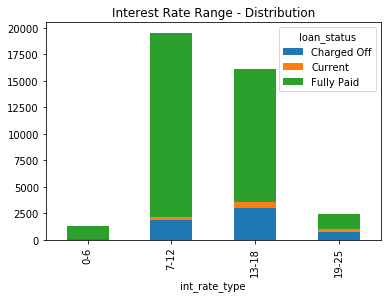

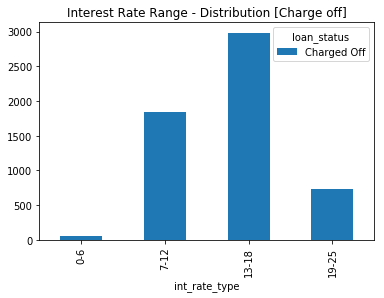

In [117]:
aggre= loan.groupby(['int_rate_type','loan_status'])['int_rate_type'].agg({'Frequency':'count'})
aggre.Frequency.unstack().plot.bar(stacked=True)
plt.title('Interest Rate Range - Distribution')
aggre= loan_charged_off.groupby(['int_rate_type','loan_status'])['int_rate_type'].agg({'Frequency':'count'})
aggre.Frequency.unstack().plot.bar(stacked=True)
plt.title('Interest Rate Range - Distribution [Charge off]')
plt.show()

###### Inference on Rate of Interest (Univariate Analysis) :
* It is clear that People have 7%-12% of rate of interest have opted more loans. But interestingly, people with 13%-18% of rate of interest have more defaulters (i.e Charge off ratio is more in the range of 13-18%)

Text(0.5,1,'Annual Income Type - Distribution [Charged Off]')

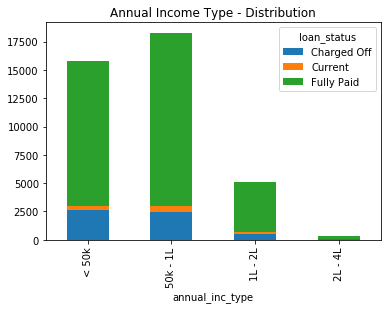

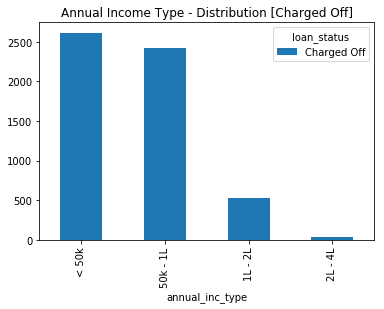

In [118]:
aggre= loan.groupby(['annual_inc_type','loan_status'])['int_rate_type'].agg({'Frequency':'count'})
aggre.Frequency.unstack().plot.bar(stacked=True)
plt.title('Annual Income Type - Distribution')
aggre= loan_charged_off.groupby(['annual_inc_type','loan_status'])['int_rate_type'].agg({'Frequency':'count'})
aggre.Frequency.unstack().plot.bar(stacked=True)
plt.title('Annual Income Type - Distribution [Charged Off]')

###### Inference on Annual Income (Univariate Analysis) :
* It is clear that People who have 50k-1L of annual income have opted more loans. But interestingly, people who have annual income <50k have more loan defaulters than people who earns 50k-1L(majority).

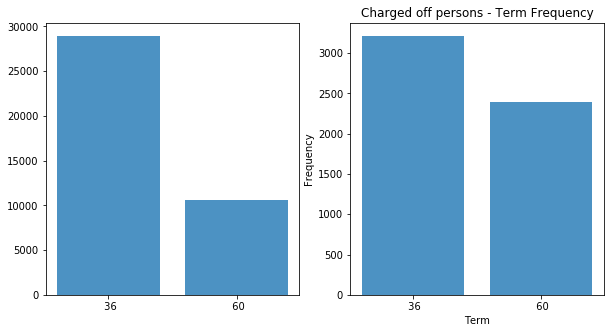

In [119]:
import seaborn as sns
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.title('Persons - Term Frequency')
plt.xlabel('Term')
plt.ylabel('Frequency')
term_count = loan['term'].value_counts()
ax1.bar(term_count.index, term_count.values, alpha=0.8)
plt.title('Charged off persons - Term Frequency')
plt.xlabel('Term')
plt.ylabel('Frequency')
loan_charged_off = loan.loc[loan['loan_status'] == 'Charged Off']
term_count_charged_off = loan_charged_off['term'].value_counts()
ax2.bar(term_count_charged_off.index, term_count_charged_off.values, alpha=0.8)
plt.show()

In [120]:
term_count

 36    28940
 60    10554
Name: term, dtype: int64

In [121]:
term_count_charged_off

 36    3213
 60    2390
Name: term, dtype: int64

###### Inference on TERM (Univariate Analysis) :
* From the graph - 'Charged off persons - Term Frequency', In both 36 months and 60 months, persons who are labelled as 'Charged Off' are available.
* On comparing the term ratio (Number of persons who opt for loan in 36 months to 60 months) for the entire dataset with the charged off dataset is 2.739 and 1.344. **Both the ratio are not almost equal and that gives us the interesting pattern**.
* Visually we can see from two graphs that, at 60 months, there is a raise in the second graph. It implies, defaulters are available in both terms. **But for the term 60 months, more defaulters are found even though the entire dataset has less number of persons who opted for 60 months**

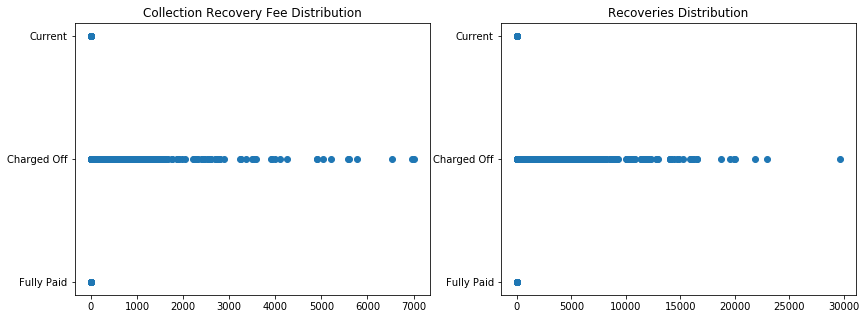

In [122]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.title('Collection Recovery Fee Distribution')
plt.scatter(loan.collection_recovery_fee, loan.loan_status)
plt.subplot(1,2,2)
plt.title('Recoveries Distribution')
plt.scatter(loan.recoveries, loan.loan_status)

###### Inference on Collection Recovery Fee & Recoveries (Univariate Analysis) :
* It is very obivious that the Charged off persons will be charged with Collection Recovery Fee and Recoveries.
* So, it is evident that these 2 columns strongly contribute to the defaulters

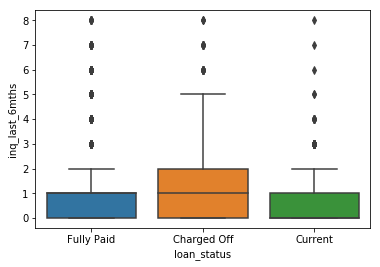

In [123]:
sns.boxplot(y='inq_last_6mths', x='loan_status', data=loan)

##### Inference on inq_last_6mths (Univariate Analysis)
* It is evident from the graph that, frequency of the people who enquired 2 times or more in the last 6 months, tend to default more.

Text(0.5,1,'Employment Length Distribution [Charged Off]')

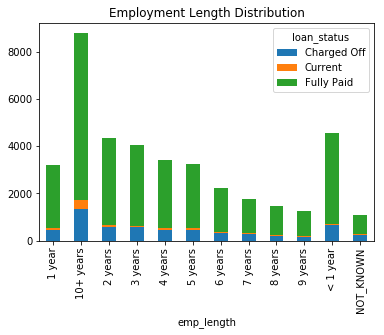

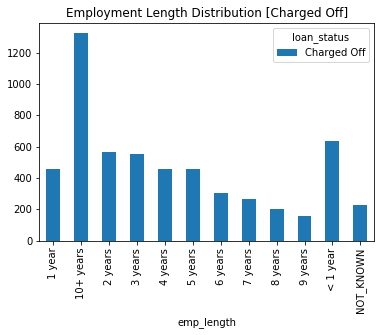

In [124]:
aggre= loan.groupby(['emp_length','loan_status'])['emp_length'].agg({'Frequency':'count'})
aggre.Frequency.unstack().plot.bar(stacked=True)
plt.title('Employment Length Distribution')
aggre= loan_charged_off.groupby(['emp_length','loan_status'])['emp_length'].agg({'Frequency':'count'})
aggre.Frequency.unstack().plot.bar(stacked=True)
plt.title('Employment Length Distribution [Charged Off]')

##### Inference on emp_length (Univariate Analysis)
* It is evident from the graph that, probability of the frequency of the people who charged off are those who are less than a year experienced
* We cannot count in 10+ experienced. Why? - As the frequency of the loan is more for 10+ experienced people, charge off count is more. **With respect to the ratio of "ChargeOff/Total", person whose employment <1 year tends to be a defaulter**

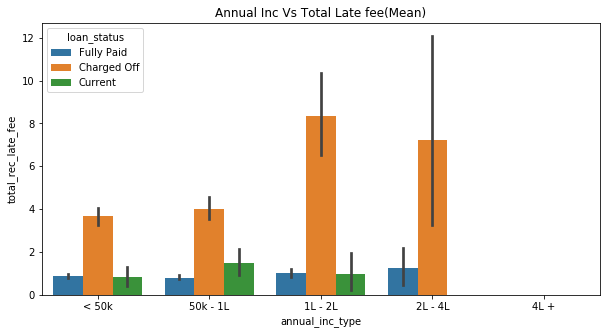

In [125]:
import seaborn as sns
plt.figure(figsize=(10, 5))
plt.title('Annual Inc Vs Total Late fee(Mean)')
sns.barplot(y='total_rec_late_fee', x='annual_inc_type', hue="loan_status", data=loan, estimator=np.mean)

##### Inference on Annual Income with LateFee on Loan Status: (Bivariate Analysis)
* From the graph on 'Annual Inc Vs Total Late fee (Mean)', it is known that people whose income falls between 1 Lakh - 4 Lakh and those who avail late fee tends to be a defaulter more.

Text(0.5,1,'Sub Grade and its probability of being Charged Off')

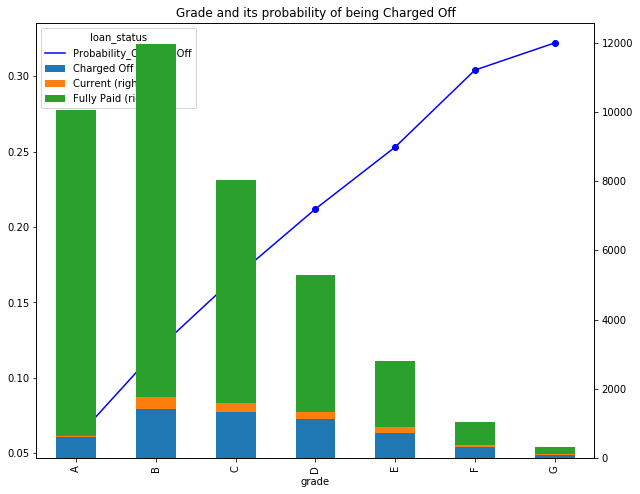

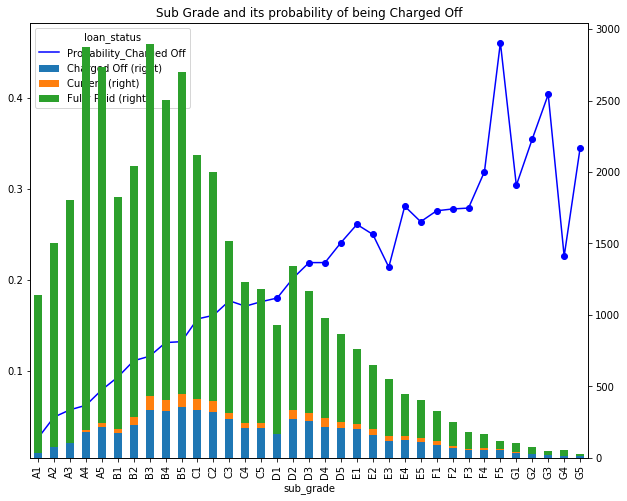

In [126]:
# Grade

crosstab = pd.crosstab(loan['grade'], loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
linePlot = crosstab[['Probability_Charged Off']]
ax = linePlot.plot(figsize=(10,8), marker='o',color = 'b')

aggre= loan.groupby(['grade','loan_status'])['grade'].agg({'Frequency':'count'})
aggre.Frequency.unstack().plot.bar(stacked=True, ax = ax, secondary_y=True)
plt.title("Grade and its probability of being Charged Off")

## Subgrade
crosstab = pd.crosstab(loan['sub_grade'], loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
linePlot = crosstab[['Probability_Charged Off']]
ax = linePlot.plot(figsize=(10,8), marker='o',color = 'b')

aggre= loan.groupby(['sub_grade','loan_status'])['sub_grade'].agg({'Frequency':'count'})
aggre.Frequency.unstack().plot.bar(stacked=True, ax = ax, secondary_y=True)
plt.title("Sub Grade and its probability of being Charged Off")

##### Inference - Grade/SubGrade (Bivariate Analysis): 
* As the Grade increases, the probability of charge off is also increased.

Text(0.5,1,'Home ownership and its probability of being Charged Off')

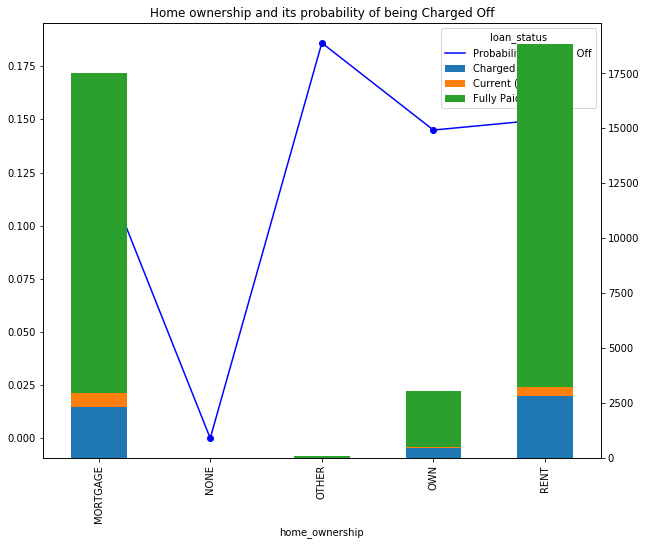

In [127]:
## Subgrade
crosstab = pd.crosstab(loan['home_ownership'], loan['loan_status'],margins=True)
crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
crosstab = crosstab[0:-1]
linePlot = crosstab[['Probability_Charged Off']]
ax = linePlot.plot(figsize=(10,8), marker='o',color = 'b')

aggre= loan.groupby(['home_ownership','loan_status'])['home_ownership'].agg({'Frequency':'count'})
aggre.Frequency.unstack().plot.bar(stacked=True, ax = ax, secondary_y=True)
plt.title("Home ownership and its probability of being Charged Off")

##### Inference - Home Ownership (Bivariate Analysis):
* People who stated 'OTHER' as their Home ownership tend to charge off more.
* Next to 'OTHER', people who stated 'RENT' as their ownership tend to charge off more